In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv("/content/synthetic_fraud_dataset.csv")

In [5]:
df.head()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   amount             10000 non-null  float64
 3   transaction_type   10000 non-null  object 
 4   merchant_category  10000 non-null  object 
 5   country            10000 non-null  object 
 6   hour               10000 non-null  int64  
 7   device_risk_score  10000 non-null  float64
 8   ip_risk_score      10000 non-null  float64
 9   is_fraud           10000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


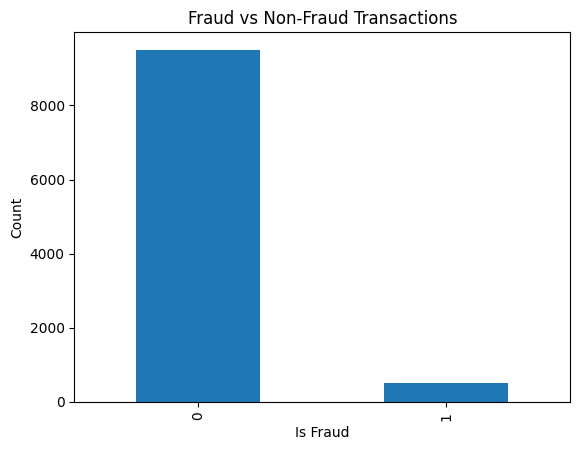

In [7]:
df['is_fraud'].value_counts().plot(kind='bar')
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud")
plt.ylabel("Count")
plt.show()

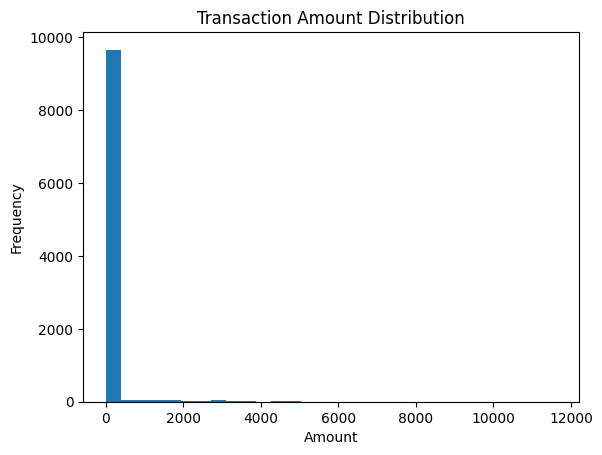

In [8]:
plt.hist(df['amount'], bins=30)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


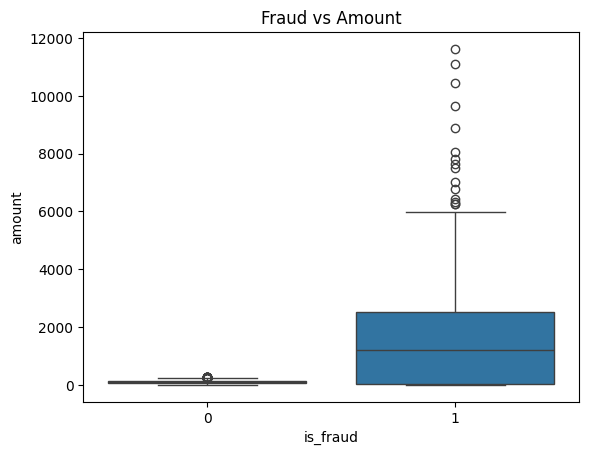

In [9]:
sns.boxplot(x='is_fraud', y='amount', data=df)
plt.title("Fraud vs Amount")
plt.show()

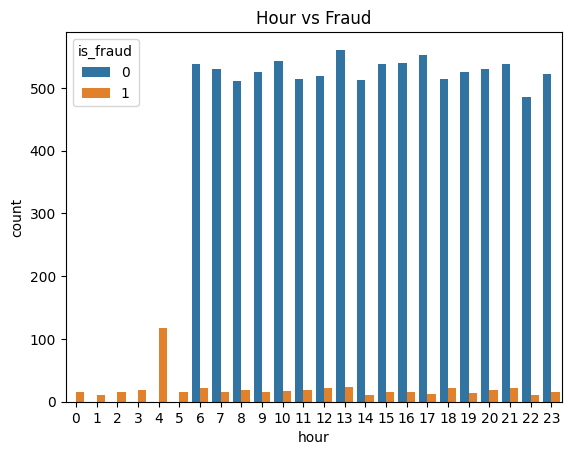

In [10]:
sns.countplot(x='hour', hue='is_fraud', data=df)
plt.title("Hour vs Fraud")
plt.show()


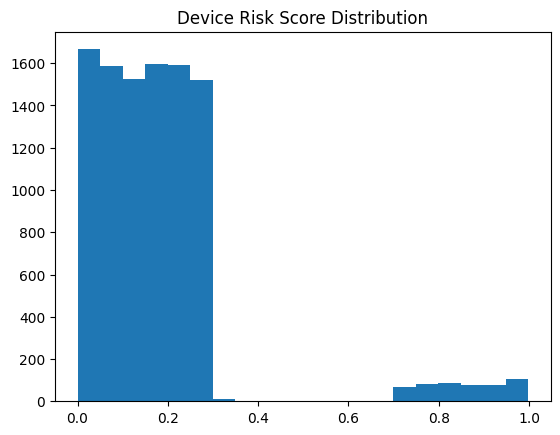

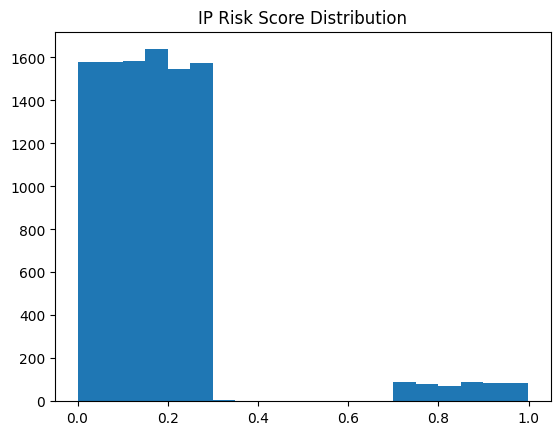

In [11]:
plt.hist(df['device_risk_score'], bins=20)
plt.title("Device Risk Score Distribution")
plt.show()

plt.hist(df['ip_risk_score'], bins=20)
plt.title("IP Risk Score Distribution")
plt.show()


In [12]:
df.drop(['transaction_id', 'user_id'], axis=1, inplace=True)


In [13]:
le = LabelEncoder()

categorical_cols = ['transaction_type', 'merchant_category', 'country']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [14]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']


In [15]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [18]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1900
           1       1.00      1.00      1.00       100

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



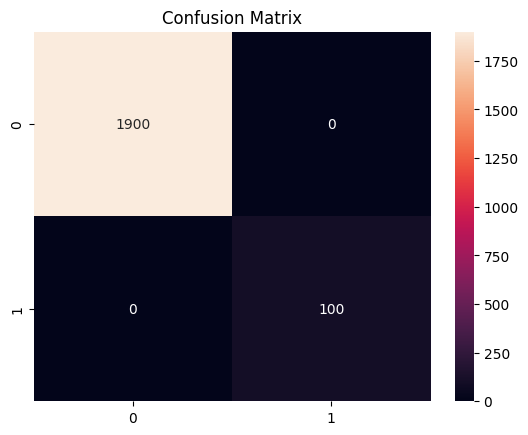

In [19]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()


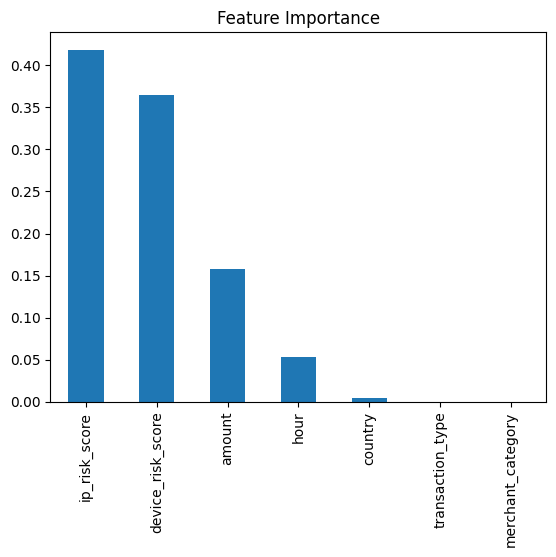

In [20]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.show()

In [23]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(class_weight='balanced'),
    param_grid,
    cv=3,
    scoring='recall'
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

In [25]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": rf
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, accuracy_score(y_test, pred))

Logistic Regression 1.0
Decision Tree 1.0
Random Forest 1.0
